In [2]:
import os
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
data_path = ['./dados/']
filepath = os.sep.join(data_path + ['results.csv'])
data = pd.read_csv(filepath, sep=',')
data_orig = data.copy()
data2 = data.copy()

In [4]:
print(data.shape)
data = data.drop(['date'], axis=1)
data2 = data2.drop(['date'], axis=1)
data = data.drop(['rank_1'], axis=1)
data = data.drop(['rank_2'], axis=1)

data = data.drop(['team_1'], axis=1)
data = data.drop(['team_2'], axis=1)
data = data.drop(['match_id'], axis=1)
data = data.drop(['event_id'], axis=1)

(45773, 19)


In [5]:
data.head()

,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,map_wins_1,map_wins_2,match_winner
0,Dust2,0,16,2,2,0,1,0,15,0,2,2
1,Inferno,13,16,2,2,8,6,5,10,0,2,2
2,Inferno,12,16,2,1,9,6,3,10,12,16,2
3,Inferno,7,16,2,2,0,8,7,8,0,2,2
4,Vertigo,8,16,2,2,4,5,4,11,0,2,2


In [6]:
data.describe()

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,map_wins_1,map_wins_2,match_winner
count,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000
mean,13.385489,12.731545,1.462478,1.501387,6.659515,6.057283,6.375571,6.335482,4.896708,4.597710,1.464204
std,4.417713,4.715722,0.498596,0.500004,3.257815,3.161310,3.184036,3.285287,6.044017,5.931323,0.498722
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,9.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000
50%,16.000000,16.000000,1.000000,2.000000,7.000000,6.000000,6.000000,6.000000,2.000000,2.000000,1.000000
75%,16.000000,16.000000,2.000000,2.000000,9.000000,8.000000,9.000000,9.000000,8.000000,7.000000,2.000000
max,38.000000,41.000000,2.000000,2.000000,15.000000,16.000000,15.000000,15.000000,34.000000,34.000000,2.000000


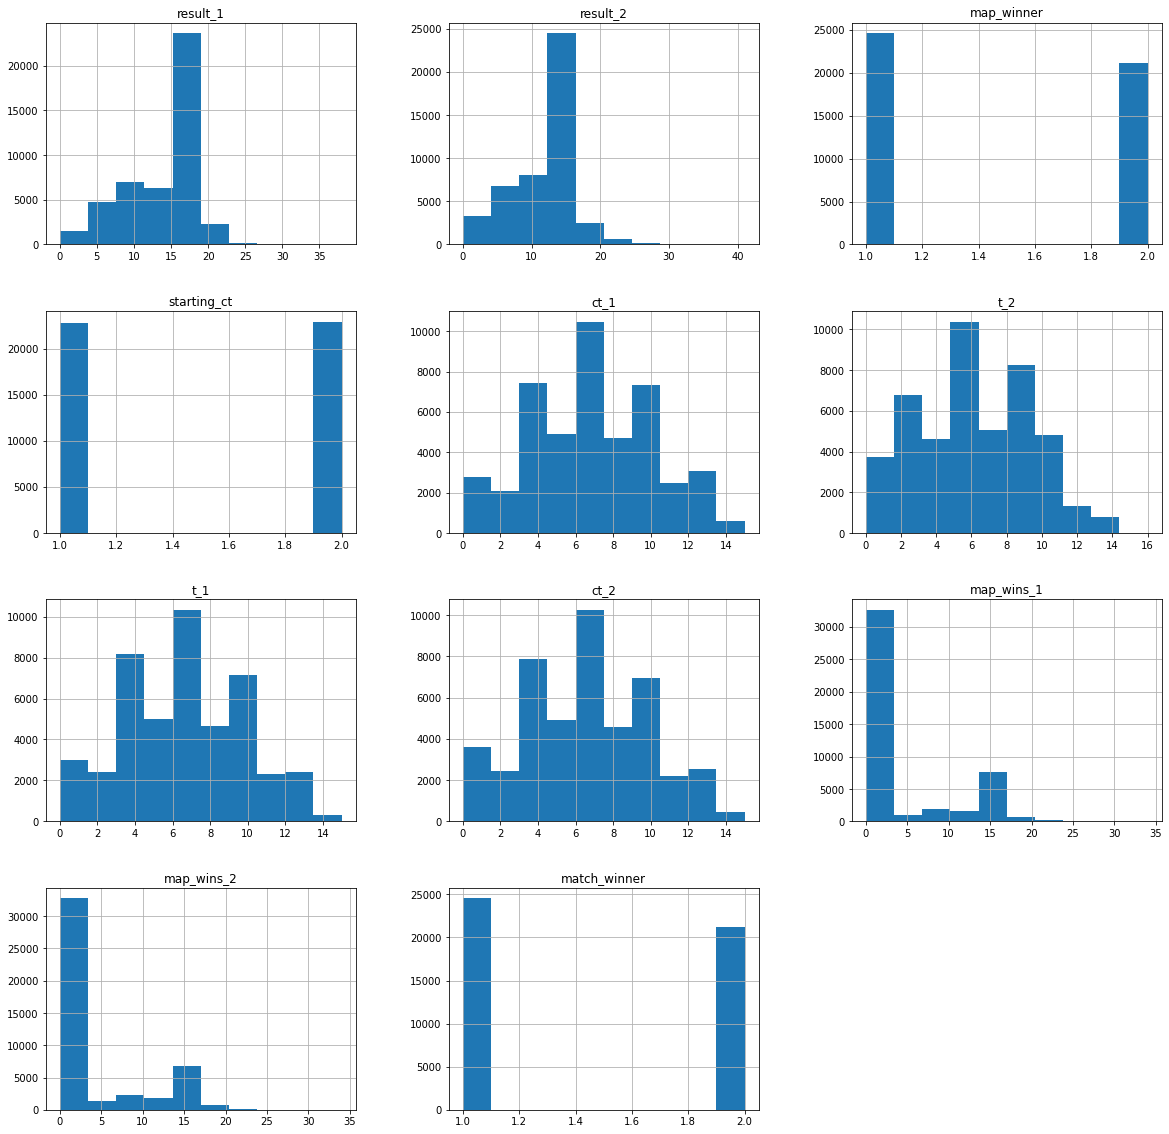

In [7]:
p = data.hist(figsize = (20,20))

In [8]:
print(data.dtypes)
print(data2.dtypes)

_map            object
result_1         int64
result_2         int64
map_winner       int64
starting_ct      int64
ct_1             int64
t_2              int64
t_1              int64
ct_2             int64
map_wins_1       int64
map_wins_2       int64
match_winner     int64
dtype: object
team_1          object
team_2          object
_map            object
result_1         int64
result_2         int64
map_winner       int64
starting_ct      int64
ct_1             int64
t_2              int64
t_1              int64
ct_2             int64
event_id         int64
match_id         int64
rank_1           int64
rank_2           int64
map_wins_1       int64
map_wins_2       int64
match_winner     int64
dtype: object


In [9]:
# Aplicar one-hot-encoding nos dados categóricos

def oneHotEncoding(df, column):
    one_hot_encoded = pd.get_dummies(df[column])
    if column == 'team_1':
        for j in one_hot_encoded.keys():
            one_hot_encoded.rename(columns={j: f'{j}_team_1'}, inplace=True)
    if column == 'team_2':
        for j in one_hot_encoded.keys():
            one_hot_encoded.rename(columns={j: f'{j}_team_2'}, inplace=True)
    df = df.drop(column,axis = 1)
    df = df.join(one_hot_encoded)
    return df

data_aux = {}
pd.DataFrame(data_aux)
categorical_features = ['_map'] # ['_map', 'team_1', 'team_2']
for i in categorical_features:
    data_aux = oneHotEncoding(data, i)
    data= data_aux.copy()


In [10]:
# for data2
data_aux = {}
pd.DataFrame(data_aux)
categorical_features = ['_map']
for i in categorical_features:
    data_aux = oneHotEncoding(data2, i)
    data2= data_aux.copy()
dummy_type_1 = pd.get_dummies(data2['team_1'])
dummy_type_2 = pd.get_dummies(data2['team_2'])

type_1_list = list(data2['team_1'].value_counts().index)
type_2_list = list(data2['team_2'].value_counts().index)
final =list(set(type_2_list+type_1_list)) 
type_1_list.sort()==type_2_list.sort()
lista=[]
for i in final:
    if i in type_1_list and i in type_2_list:
        lista.append(i)
lista_exclusiva_time2 = []
lista_exclusiva_time1=[]
for i in final:
    if i not in type_1_list and i in type_2_list:
        lista_exclusiva_time2.append(i)
    if i not in type_2_list and i in type_1_list:
        lista_exclusiva_time1.append(i)

dummy_final = pd.DataFrame(index=data2.index)
for column_name in lista:
    dummy_final[column_name] = dummy_type_1[column_name] + dummy_type_2[column_name]
for column_name in lista_exclusiva_time2:
    dummy_final[column_name] = dummy_type_2[column_name]
for column_name in lista_exclusiva_time1:
    dummy_final[column_name] = dummy_type_1[column_name]

In [11]:
dummy_final['TeamOne']#Recon 5,
dummy_final.describe()

,Niknexus,proWince,NOORG,k1ck,NOREG,Forcebuy,Evilvice,GODSENT Academy,1WIN,Imperio Multimedia,...,Kazek,Lemondogs,Zeta Strike,WeGotGame,EoN,BE INFAMOUS,GoldenMix,Nice,Carnage fe,calmface
count,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,...,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000
mean,0.000131,0.000284,0.000131,0.002840,0.000634,0.000961,0.000437,0.000371,0.000328,0.000306,...,0.000044,0.000044,0.000109,0.000044,0.000044,0.000044,0.000066,0.000066,0.000087,0.000044
std,0.011448,0.016850,0.011448,0.054435,0.025163,0.030990,0.020899,0.019268,0.018100,0.017486,...,0.006610,0.006610,0.010451,0.006610,0.006610,0.006610,0.008096,0.008096,0.009348,0.006610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data2 = data2.drop(['team_1'], axis=1)
data2 = data2.drop(['team_2'], axis=1)
data2_new = pd.concat([data2,dummy_final],sort=False,axis=1)
data2_new.head()

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,...,Kazek,Lemondogs,Zeta Strike,WeGotGame,EoN,BE INFAMOUS,GoldenMix,Nice,Carnage fe,calmface
0,0,16,2,2,0,1,0,15,5151,2340454,...,0,0,0,0,0,0,0,0,0,0
1,13,16,2,2,8,6,5,10,5151,2340454,...,0,0,0,0,0,0,0,0,0,0
2,12,16,2,1,9,6,3,10,5243,2340461,...,0,0,0,0,0,0,0,0,0,0
3,7,16,2,2,0,8,7,8,5151,2340453,...,0,0,0,0,0,0,0,0,0,0
4,8,16,2,2,4,5,4,11,5151,2340453,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data2_new.keys()

Index(['result_1', 'result_2', 'map_winner', 'starting_ct', 'ct_1', 't_2',
       't_1', 'ct_2', 'event_id', 'match_id',
       ...
       'Kazek', 'Lemondogs', 'Zeta Strike', 'WeGotGame', 'EoN', 'BE INFAMOUS',
       'GoldenMix', 'Nice', 'Carnage fe', 'calmface'],
      dtype='object', length=1579)

In [14]:
data.keys()

Index(['result_1', 'result_2', 'map_winner', 'starting_ct', 'ct_1', 't_2',
       't_1', 'ct_2', 'map_wins_1', 'map_wins_2', 'match_winner', 'Cache',
       'Cobblestone', 'Default', 'Dust2', 'Inferno', 'Mirage', 'Nuke',
       'Overpass', 'Train', 'Vertigo'],
      dtype='object')

In [15]:
data.head()

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,map_wins_1,map_wins_2,...,Cache,Cobblestone,Default,Dust2,Inferno,Mirage,Nuke,Overpass,Train,Vertigo
0,0,16,2,2,0,1,0,15,0,2,...,0,0,0,1,0,0,0,0,0,0
1,13,16,2,2,8,6,5,10,0,2,...,0,0,0,0,1,0,0,0,0,0
2,12,16,2,1,9,6,3,10,12,16,...,0,0,0,0,1,0,0,0,0,0
3,7,16,2,2,0,8,7,8,0,2,...,0,0,0,0,1,0,0,0,0,0
4,8,16,2,2,4,5,4,11,0,2,...,0,0,0,0,0,0,0,0,0,1


In [156]:
import pickle
"""corr_mat_data = data.corr()
for x in range(corr_mat_data.shape[0]):
    corr_mat_data.iloc[x,x] = 0.0

corr_mat_data2 = data2_new.corr()
for x in range(corr_mat_data2.shape[0]):
    corr_mat_data2.iloc[x,x] = 0.0

file_to_store = open("corr_mat_data.pickle", "wb")
pickle.dump(corr_mat_data, file_to_store)
file_to_store.close()
file_to_store = open("corr_mat_data2.pickle", "wb")
pickle.dump(corr_mat_data2, file_to_store)
file_to_store.close()"""

'corr_mat_data = data.corr()\nfor x in range(corr_mat_data.shape[0]):\n    corr_mat_data.iloc[x,x] = 0.0\n\ncorr_mat_data2 = data2_new.corr()\nfor x in range(corr_mat_data2.shape[0]):\n    corr_mat_data2.iloc[x,x] = 0.0\n\nfile_to_store = open("corr_mat_data.pickle", "wb")\npickle.dump(corr_mat_data, file_to_store)\nfile_to_store.close()\nfile_to_store = open("corr_mat_data2.pickle", "wb")\npickle.dump(corr_mat_data2, file_to_store)\nfile_to_store.close()'

In [157]:
with open('corr_mat_data.pickle', 'rb') as handle:
    corr_mat_open_data = pickle.load(handle)
with open('corr_mat_data2.pickle', 'rb') as handle:
    corr_mat_open_data2 = pickle.load(handle)

In [158]:
corr_mat_open_data2.abs().idxmax()

result_1           map_winner
result_2           map_winner
map_winner       match_winner
starting_ct              ct_1
ct_1                 result_1
                    ...      
Aria               RESISTANCE
ex-Caladrius            Surge
INTZ.Home                 W7M
Player 5        m0nster white
Lebanon                  Iraq
Length: 1579, dtype: object

In [159]:
corr_mat_open_data.abs().idxmax()

result_1          map_winner
result_2          map_winner
map_winner      match_winner
starting_ct             ct_1
ct_1                result_1
t_2                 result_2
t_1                 result_1
ct_2                result_2
map_wins_1        map_wins_2
map_wins_2        map_wins_1
match_winner      map_winner
Cache                 Mirage
Cobblestone           Mirage
Default           map_wins_2
Dust2                 Mirage
Inferno               Mirage
Mirage               Inferno
Nuke                  Mirage
Overpass              Mirage
Train                 Mirage
Vertigo               Mirage
dtype: object

In [160]:
log_columns_data = data.skew().sort_values(ascending=False)
log_columns_data = log_columns_data.loc[log_columns_data > 0.75]

log_columns_data

Default        46.656294
Vertigo         8.495830
Cobblestone     3.180157
Dust2           2.868004
Nuke            2.825685
Cache           2.652385
Overpass        2.297363
Train           2.034443
Inferno         1.819617
Mirage          1.523042
map_wins_2      1.292629
map_wins_1      1.224467
dtype: float64

In [161]:
log_columns_data2 = data2_new.skew().sort_values(ascending=False)
log_columns_data2 = log_columns_data2.loc[log_columns_data2 > 0.75]

log_columns_data2

Novacancy     213.946255
FiveG         213.946255
S2V           213.946255
Shot          213.946255
FootGang      213.946255
                 ...    
Mirage          1.523042
rank_1          1.413452
map_wins_2      1.292629
rank_2          1.274530
map_wins_1      1.224467
Length: 1568, dtype: float64

In [162]:
"""file_to_store = open("log_columns_data2.pickle", "wb")
pickle.dump(log_columns_data2, file_to_store)
file_to_store.close()

file_to_store = open("log_columns_data.pickle", "wb")
pickle.dump(log_columns_data, file_to_store)
file_to_store.close()"""

with open('log_columns_data2.pickle', 'rb') as handle:
    log_columns_data2 = pickle.load(handle)
with open('log_columns_data.pickle', 'rb') as handle:
    log_columns_data = pickle.load(handle)

"with open('log_columns_data2.pickle', 'rb') as handle:\n    log_columns_data2 = pickle.load(handle)\nwith open('log_columns_data.pickle', 'rb') as handle:\n    log_columns_data = pickle.load(handle)"

In [169]:
# The log transformations
for col in log_columns_data2.index:
    data2_new[col] = np.log1p(data2_new[col])

In [168]:
for col in log_columns_data.index:
    data[col] = np.log1p(data[col])

In [16]:
data.keys()

Index(['result_1', 'result_2', 'map_winner', 'starting_ct', 'ct_1', 't_2',
       't_1', 'ct_2', 'map_wins_1', 'map_wins_2', 'match_winner', 'Cache',
       'Cobblestone', 'Default', 'Dust2', 'Inferno', 'Mirage', 'Nuke',
       'Overpass', 'Train', 'Vertigo'],
      dtype='object')

In [17]:
data.dtypes

result_1        int64
result_2        int64
map_winner      int64
starting_ct     int64
ct_1            int64
t_2             int64
t_1             int64
ct_2            int64
map_wins_1      int64
map_wins_2      int64
match_winner    int64
Cache           uint8
Cobblestone     uint8
Default         uint8
Dust2           uint8
Inferno         uint8
Mirage          uint8
Nuke            uint8
Overpass        uint8
Train           uint8
Vertigo         uint8
dtype: object

In [18]:
# Convert to floats
for col in data.columns:
    data[col] = data[col].astype(np.float)
for col in data2_new.columns:
    data2_new[col] = data2_new[col].astype(np.float)

<ipython-input-18-c6530f234254>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col] = data[col].astype(np.float)
<ipython-input-18-c6530f234254>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2_new[col] = data2_new[col].astype(np.float)


In [175]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('match_winner', axis=1)
y = data.match_winner
sss = StratifiedShuffleSplit(n_splits=10, random_state=50)

def get_avg_score(n):
    pipe = [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
score_list = [get_avg_score(n) for n in ns]

[0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.995128877238969, 0.995128877238969, 0.995128877238969, 0.995128877238969, 0.995128877238969]


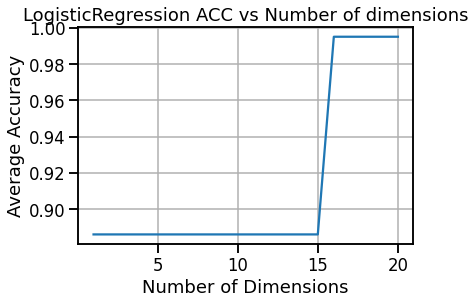

In [176]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression ACC vs Number of dimensions')
ax.grid(True)
plt.savefig(f'StandardScaler.png', dpi=100)
print(score_list)

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_data2 = data2_new.drop('match_winner', axis=1)
y_data2 = data2_new.match_winner
sss = StratifiedShuffleSplit(n_splits=5, random_state=50)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(max_iter=1000))
    ]
    pipe = Pipeline(pipe)
    scores = []
    
    for train_index, test_index in sss.split(X_data2, y_data2):
        X_data2_train, X_data2_test = X_data2.loc[train_index], X_data2.loc[test_index]
        y_data2_train, y_data2_test = y_data2.loc[train_index], y_data2.loc[test_index]
        pipe.fit(X_data2_train, y_data2_train)
        scores.append(accuracy_score(y_data2_test, pipe.predict(X_data2_test)))
    return np.mean(scores)

ns2 = [1, 2, 3,4, 5, 10, 50, 100, 200, 500, 800, 1000, 1300, 1500, 1578]
score_list2 = [get_avg_score(n) for n in ns2]

NameError: name 'data2_new' is not defined

[0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.8861293141109655, 0.995128877238969, 0.995128877238969, 0.995128877238969, 0.995128877238969, 0.995128877238969]


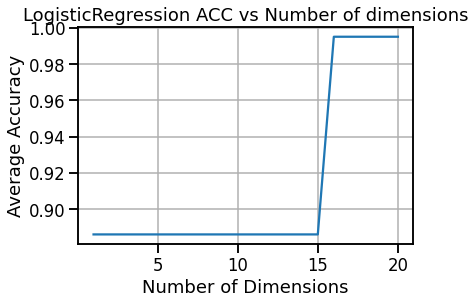

In [174]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns2, score_list2)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression ACC vs Number of dimensions')
ax.grid(True)
plt.savefig(f'StandardScaler2.png', dpi=100)
print(score_list2)

In [ ]:
# PCA
features = list(data.keys())
features.remove('match_winner')
print((features))
target = ['match_winner']

['result_1', 'result_2', 'map_winner', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'event_id', 'match_id', 'rank_1', 'rank_2', 'map_wins_1', 'map_wins_2', 'Cache', 'Cobblestone', 'Default', 'Dust2', 'Inferno', 'Mirage', 'Nuke', 'Overpass', 'Train', 'Vertigo']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Separação das features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['match_winner']].values
# Standardizing the features
x = MinMaxScaler().fit_transform(x)
x

array([[0.        , 0.3902439 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34210526, 0.3902439 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31578947, 0.3902439 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42105263, 0.29268293, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42105263, 0.09756098, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.42105263, 0.2195122 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,0.888317,0.430125
1,0.625480,0.374756
2,0.461808,-0.590214
3,0.739146,0.431478
4,0.728356,0.395758
...,...,...
45768,0.428931,-0.592290
45769,-0.529903,-0.415645
45770,-0.565937,-0.379001
45771,-0.509175,0.671749


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()